<a href="https://colab.research.google.com/github/AlinaStrav/Practical_Project_Computer_Vision_and_Image_Classification/blob/main/Practical_Project_7_Alina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files

In [ ]:
os.environ['KAGGLE_USERNAME'] = "alinastravinskiene"
os.environ['KAGGLE_KEY'] = "******"

In [ ]:
! kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

100% 572M/572M [00:26<00:00, 24.4MB/s]
100% 572M/572M [00:26<00:00, 22.5MB/s]


In [ ]:
! unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:
for dirpath, dirname, filename in os.walk('/content/COVID_IEEE'):
    print(f"there are {len(dirname)} directory and {len(filename)} image in '{dirpath}'.")

there are 3 directory and 0 image in '/content/COVID_IEEE'.
there are 0 directory and 619 image in '/content/COVID_IEEE/virus'.
there are 0 directory and 668 image in '/content/COVID_IEEE/normal'.
there are 0 directory and 536 image in '/content/COVID_IEEE/covid'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_name = np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [ ]:
def view_image (target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)

    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap = "gray")
    plt.title(target_class)

    return img

['covid1900117.png']


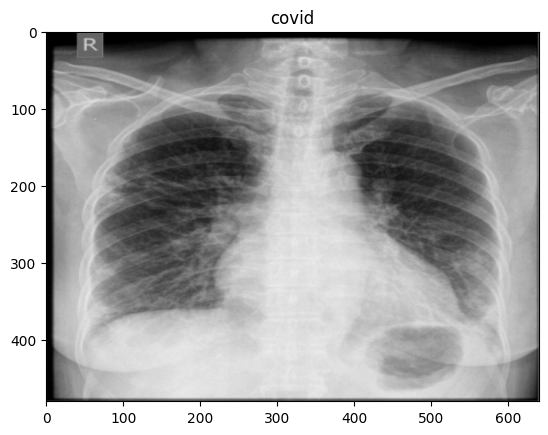

In [ ]:
img = view_image("/content/COVID_IEEE/", "covid")

['NORMAL2-IM-0554-0001.jpeg']


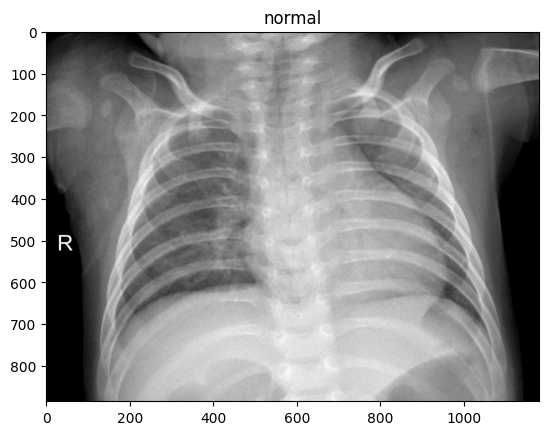

In [ ]:
img = view_image("/content/COVID_IEEE/", "normal")

['person1295_virus_2223.jpeg']


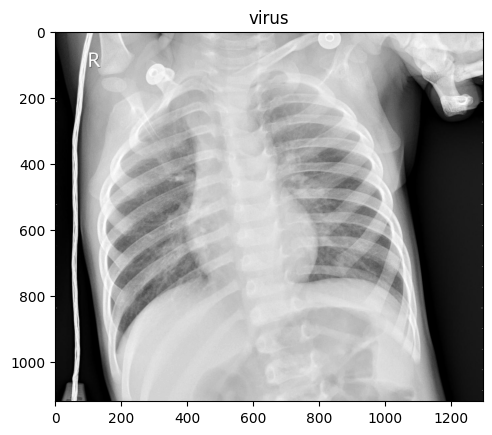

In [ ]:
img = view_image("/content/COVID_IEEE/", "virus")

In [ ]:
data = []
labels = []

covid = os.listdir("/content/COVID_IEEE/covid/")

for i in covid:
    
    image = cv2.imread("/content/COVID_IEEE/covid/"+i)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(0)

In [ ]:
normal = os.listdir("/content/COVID_IEEE/normal/")

for i in normal:
    
    image = cv2.imread("/content/COVID_IEEE/normal/"+i)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(1)

In [ ]:
virus = os.listdir("/content/COVID_IEEE/virus/")

for i in virus:
    
    image = cv2.imread("/content/COVID_IEEE/virus/"+i)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.12156863, 0.12156863, 0.12156863],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.03921569, 0.03921569, 0.03921569]

In [ ]:
img_labels

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
from keras import regularizers

model = Sequential()

model.add(BatchNormalization(input_shape=(224,224,3)))
# model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
# model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 224, 224, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Šiam projektiniam darbui naudojau Kaggle esantį Covid dataseta. Šį kartą norėjau datasetą įsikelti tiegiai iš kaggle, ankščiau duomenis parsisiųsdavau įsikeldavai į github ir iš ten parsisiųsdavau į programą. Kadangi rentgeno nuotraukos trijuose skirtinguose kataloguose, reikėjo pereiti per visus ir sudėti viską į vieną datasetą - tai dariau pirmą kartą. Svabiausia, kad darydama šį projektą manau galutinai supratau kam reikalinga validation data ir kaip vertinti modelį. Priminiai modelio rezultatai buvo: loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.2240 - val_accuracy: 0.9384, kas rodo galimą modelio overfitinimą. Tuomet pridėjau reaguliarizacijos metodą L2. Modelio rezultatai yra tokie: loss: 0.4660 - accuracy: 0.9578 - val_loss: 0.5111 - val_accuracy: 0.9361. Dabar loss ir val_loss yra panašūs, vadinasi modelis gerai spėja tiek ant treniruojanos dataos, tieke ant dar nematytos(validation datos).

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32 )

# loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.2240 - val_accuracy: 0.9384
# loss: 0.4445 - accuracy: 0.9549 - val_loss: 0.5280 - val_accuracy: 0.9155

Epoch 1/15
32/32 [==============================] - 66s 2s/step - loss: 8.3279 - accuracy: 0.7235 - val_loss: 4.4515 - val_accuracy: 0.8174
Epoch 2/15
32/32 [==============================] - 63s 2s/step - loss: 3.2541 - accuracy: 0.8951 - val_loss: 2.6588 - val_accuracy: 0.8470
Epoch 3/15
32/32 [==============================] - 66s 2s/step - loss: 1.7899 - accuracy: 0.9324 - val_loss: 1.5977 - val_accuracy: 0.8995
Epoch 4/15
32/32 [==============================] - 67s 2s/step - loss: 1.1753 - accuracy: 0.9284 - val_loss: 1.1860 - val_accuracy: 0.9224
Epoch 5/15
32/32 [==============================] - 67s 2s/step - loss: 0.8458 - accuracy: 0.9569 - val_loss: 0.9405 - val_accuracy: 0.8973
Epoch 6/15
32/32 [==============================] - 67s 2s/step - loss: 0.6606 - accuracy: 0.9510 - val_loss: 0.7860 - val_accuracy: 0.8973
Epoch 7/15
32/32 [==============================] - 66s 2s/step - loss: 0.5846 - accuracy: 0.9549 - val_loss: 0.6387 - val_accuracy: 0.9315
Epoch 8/15
32/32 [==

Text(0.5, 1.0, 'Training and Validation accuracy')

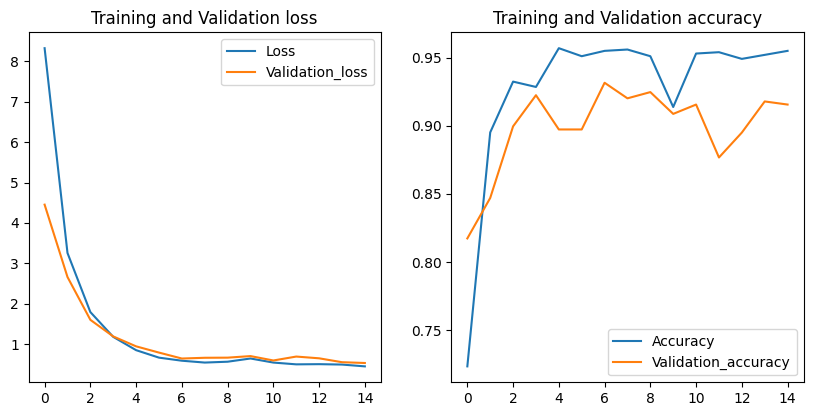

In [ ]:
loss = pd.DataFrame(model.history.history)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label="Loss")
plt.plot(loss["val_loss"], label="Validation_loss")
plt.legend()
plt.title("Training and Validation loss")

plt.subplot(2,2,2)
plt.plot(loss["accuracy"], label="Accuracy")
plt.plot(loss["val_accuracy"], label="Validation_accuracy")
plt.legend()
plt.title("Training and Validation accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis=1)
y_test_new = np.argmax(y_test, axis=1)

12/12 [==============================] - 6s 485ms/step


In [ ]:
target_names = ["covid", "normal", "virus"]
print(classification_report(y_test_new, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       covid       0.98      0.97      0.98       108
      normal       0.93      0.98      0.95       129
       virus       0.98      0.93      0.96       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



Summary: For this project work, I am using the Covid X-ray image dataset available on Kaggle. Since the x-rays were in three different directories, I had to go through them all and put them into one dataset, which I did for the first time. The best part is that with this project I finally understood why we need validation data and how to evaluate the model. The results of the first model were: loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.2240 - val_accuracy: 0.9384 - indicating a possible overfitting of the model. Then I added L2 regularization methods. The model results are: loss: 0.4660 - accuracy: 0.9578 - val_loss: 0.5111 - val_accuracy: 0.9361. Loss and val_loss are now similar, which means that the model predicts well both on training data and on previously unseen data (validation data).